In [22]:
try:
    from mpl_toolkits.basemap import Basemap
except:
    %pip install basemap
    %pip install mlxtend
    
try:
    import matplotlib.pyplot as plt
except:
    %pip install matplotlib

try:
    import seaborn as sns
except:
    %pip install seaborn
    

    


In [2]:
%pip install s3fs
%pip install fsspec

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 143 kB 34.5 MB/s eta 0:00:01
     |████████████████████████████████| 66 kB 10.7 MB/s eta 0:00:01
     |████████████████████████████████| 75 kB 7.0 MB/s  eta 0:00:01
     |████████████████████████████████| 9.1 MB 28 kB/s s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [36]:
import pandas as pd
import numpy as np
import csv
import matplotlib.colors as mcolors


# Read data from S3

### using S3fs supported pandas api, we will be reading the data from aws s3 bucket

In [2]:
app_events_df = pd.read_csv("s3://ad-campaign-recommender/app_events.csv",dtype={'app_id': str, 'event_id': str})
app_events_df.dtypes

event_id        object
app_id          object
is_installed     int64
is_active        int64
dtype: object

In [3]:
print(f' total no of app events in the dataframe: {app_events_df.size} ')
app_events_df.head(n=25)

 total no of app events in the dataframe: 129892268 


,event_id,app_id,is_installed,is_active
0,2,5927333115845830913,1,1
1,2,-5720078949152207372,1,0
2,2,-1633887856876571208,1,0
3,2,-653184325010919369,1,1
4,2,8693964245073640147,1,1
5,2,4775896950989639373,1,1
6,2,-8022267440849930066,1,0
7,2,9112463267739110219,1,0
8,2,-3725672010020973973,1,0
9,2,7167114343576723123,1,1


In [14]:
datatypes = {
    'device_id': str,
    'latitude': float,
    'longitude': float   
}
train_events_df = pd.read_csv("s3://ad-campaign-recommender/train_event_data.csv",
                              dtype=datatypes)
train_events_df.dtypes

device_id         object
gender            object
age                int64
group_train       object
event_id         float64
datetimestamp     object
latitude         float64
longitude        float64
dtype: object

In [5]:
print(f' total no of train events in the dataframe: {train_events_df.size}')
train_events_df.head(n=25)

 total no of train events in the dataframe: 10135464


,device_id,gender,age,group_train,event_id,datetimestamp,latitude,longitude
0,-7548291590301750000,M,33,M32+,2369465.0,2016-05-03 15:55:35,33.98,116.79
1,-7548291590301750000,M,33,M32+,1080869.0,2016-05-03 06:07:16,33.98,116.79
2,-7548291590301750000,M,33,M32+,1079338.0,2016-05-04 03:28:02,33.98,116.79
3,-7548291590301750000,M,33,M32+,1078881.0,2016-05-04 02:53:08,33.98,116.79
4,-7548291590301750000,M,33,M32+,1068711.0,2016-05-03 15:59:35,33.98,116.79
5,-7548291590301750000,M,33,M32+,982494.0,2016-05-04 09:34:08,33.98,116.79
6,-7548291590301750000,M,33,M32+,981210.0,2016-05-04 08:55:48,33.98,116.79
7,-7548291590301750000,M,33,M32+,951554.0,2016-05-04 09:42:06,33.98,116.79
8,-7548291590301750000,M,33,M32+,945147.0,2016-05-04 03:19:36,33.98,116.79
9,-7548291590301750000,M,33,M32+,931005.0,2016-05-03 15:14:39,33.98,116.79


In [6]:
datatypes = {
    'app_id': str
}
app_events_meta_df = pd.read_csv("s3://ad-campaign-recommender/app_events_meta_data.csv",
                              dtype=datatypes,quoting=csv.QUOTE_NONE,skiprows=[1]) 
print(f' total no of records in the dataframe "app_events_meta_df": {app_events_meta_df.size}')
app_events_meta_df.dtypes

 total no of records in the dataframe "app_events_meta_df": 1379829


app_id      object
label_id     int64
category    object
dtype: object

In [7]:
app_events_meta_df.head(n=25)

,app_id,label_id,category
0,7324884708820027918,251,Finance
1,-4494216993218550286,251,Finance
2,6058196446775239644,406,unknown
3,6058196446775239644,407,DS_P2P net loan
4,8694625920731541625,406,unknown
5,8694625920731541625,407,DS_P2P net loan
6,1977658975649789753,406,unknown
7,1977658975649789753,407,DS_P2P net loan
8,7311663864768030840,256,Securities
9,5902120154267999338,256,Securities


In [8]:
datatypes = {
    'device_id': str
}

train_mobile_brand_df = pd.read_csv("s3://ad-campaign-recommender/train_mobile_brand.csv",
                                   dtype=datatypes)
print(f' total no of records in the dataframe "train_mobile_brand_df": {train_mobile_brand_df.size}')
train_mobile_brand_df.dtypes

 total no of records in the dataframe "train_mobile_brand_df": 449040


device_id       object
gender          object
age              int64
group_train     object
phone_brand     object
device_model    object
dtype: object

In [9]:
train_mobile_brand_df.head(n=25)

,device_id,gender,age,group_train,phone_brand,device_model
0,-7548291590301750000,M,33,M32+,Huawei,è£è€€3C
1,6943568600617760000,M,37,M32+,Xiaomi,xnote
2,5441349705980020000,M,40,M32+,OPPO,R7s
3,-5393876656119450000,M,33,M32+,Xiaomi,MI 4
4,4543988487649880000,M,53,M32+,samsung,Galaxy S4
5,-1819925713085810000,F,23,F0-24,OPPO,N1 Mini
6,3670076507269740000,M,33,M32+,Meizu,menote1 2
7,3585775875204580000,F,51,F32+,Xiaomi,MI 4
8,7442042493953950000,M,26,M25-32,Huawei,hu1 plus
9,-1243925047576100000,F,37,F32+,Xiaomi,xnote


# Cleaning Data

In [10]:
app_events_df.isnull().sum()

event_id        0
app_id          0
is_installed    0
is_active       0
dtype: int64

There are no null values in app_events data

In [11]:
app_events_df.dtypes

event_id        object
app_id          object
is_installed     int64
is_active        int64
dtype: object

All the data types are as expected

In [15]:
# check null values in train events data frame
train_events_df.isnull().sum()

device_id            0
gender               0
age                  0
group_train          0
event_id         51335
datetimestamp    51335
latitude         51335
longitude        51335
dtype: int64

There are 51335 rows with null values in train events data frame which fall under Scenario2 and hence we will not delete these values and will use filters to fetch the values for Scenario1

In [16]:
train_events_df.dtypes

device_id         object
gender            object
age                int64
group_train       object
event_id         float64
datetimestamp     object
latitude         float64
longitude        float64
dtype: object

All the data types in train events dataframe are as expected

In [17]:
app_events_meta_df.isnull().sum()

app_id      0
label_id    0
category    0
dtype: int64

There are no null values in app events meta dataframe

In [18]:
app_events_meta_df.dtypes

app_id      object
label_id     int64
category    object
dtype: object

All the columns have expected data types in app events meta dataframe.

In [19]:
train_mobile_brand_df.isnull().sum()

device_id       0
gender          0
age             0
group_train     0
phone_brand     0
device_model    0
dtype: int64

There are no null values in train mobile brand dataframe

In [20]:
train_mobile_brand_df.dtypes

device_id       object
gender          object
age              int64
group_train     object
phone_brand     object
device_model    object
dtype: object

All the columns have expected data types in train mobile brand dataframe.

# Exploratory Data Analysis

## Percentage of device_ids with and without event data

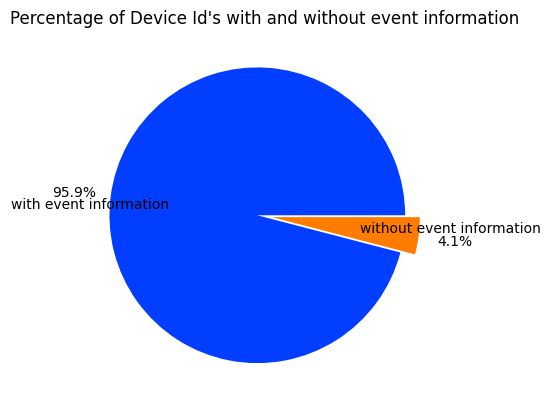

In [23]:
train_events_df['is_event_data_available'] = [False if pd.isna(x) else True for x in train_events_df['event_id']]

palette_color = sns.color_palette('bright')
explode = (0.05, 0.05)
data = train_events_df['is_event_data_available'].value_counts()
labels = ['with event information','without event information']
plt.title("Percentage of Device Id's with and without event information")
plt.pie(data, labels=labels, 
        autopct='%1.1f%%',
       pctdistance=1.25, labeldistance=.6, explode= explode,colors=palette_color)
plt.show()



### Inference:
* 95.9% of data has event information which falls under Scenario 1 where user enabled the tracking information
* 4.1% of data has no event information indicating that users didn't enable the tracking and falls under Scenario 2

## Distribution of age and gender in the train event data

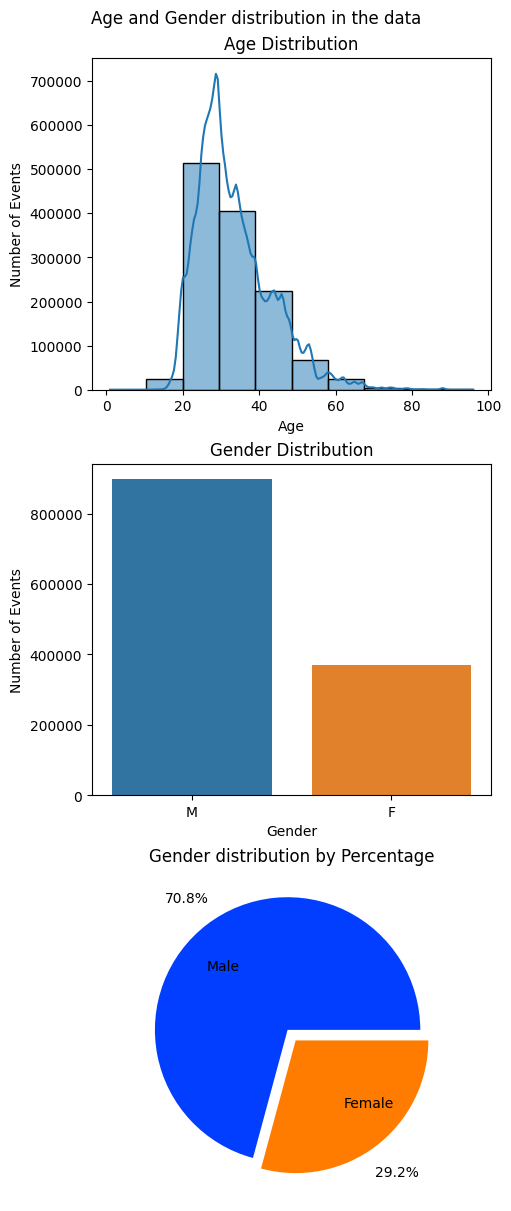

In [34]:
fig, (ax1,ax2,ax3) = plt.subplots(3, 1,figsize=(5,12),constrained_layout=True)

fig.suptitle("Age and Gender distribution in the data")
# age distribution plot using seaborn histplot
sns.histplot(x = train_events_df['age'], ax = ax1, kde=True, bins = 10)
ax1.set_xlabel('Age')
ax1.set_ylabel('Number of Events')
ax1.set_title('Age Distribution')

# gender distribution plot using seaborn
# sns.barplot(data=train_events_df, x= 'gender', ax = ax2)
sns.countplot(x = train_events_df['gender'], ax = ax2)
ax2.set_xlabel('Gender')
ax2.set_ylabel('Number of Events')
ax2.set_title('Gender Distribution')



palette_color = sns.color_palette('bright')
explode = (0.05, 0.05)
data = train_events_df['gender'].value_counts()
labels = ['Male','Female']
ax3.pie(data, labels=labels, 
        autopct='%1.1f%%',
       pctdistance=1.25, labeldistance=.6, explode= explode,colors=palette_color)
ax3.set_title("Gender distribution by Percentage")

plt.show()

### Age and Gender distribution Inference:

* Age Distribution: Major percentage of data belong to people of age between 20 and 50 with highest percentage of people in the age between 20 and 30
* Gender Distribution: The majority data contains details of Male gender which is more than 50% of Female data.


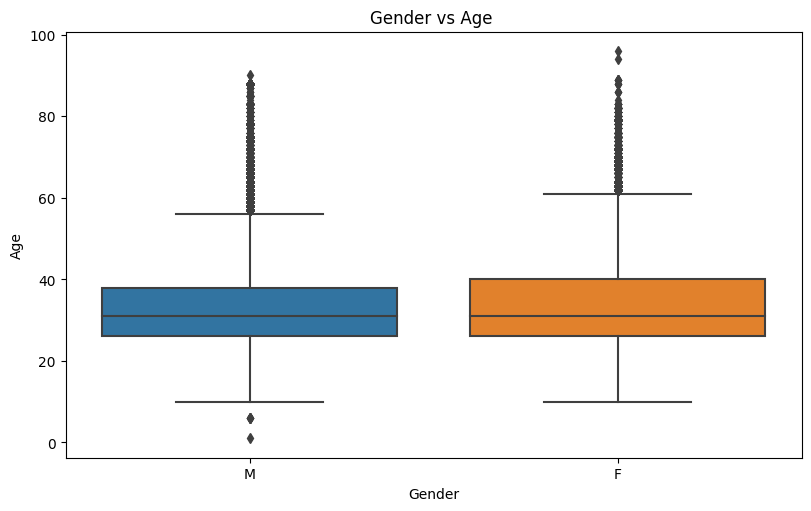

In [46]:
fig,ax = plt.subplots(figsize=(8,5),constrained_layout=True)
sns.boxplot(data=train_events_df, x='gender', y='age', ax=ax)
ax.set_title('Gender vs Age ')
ax.set_xlabel('Gender')
ax.set_ylabel('Age')
plt.show()

### Inferences:
* Both Male and Female population in the given data has the median age of 30 
* Majority of population, both male and female lie between the age of 25 and 40 
* Female population has slightly larger inter-quartile range indicating the female population has more age range compared to the male population.
  